In [1]:
#70
#途中まで50と同じ

#データダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2022-01-10 14:25:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  15.6MB/s    in 1.8s    

2022-01-10 14:25:16 (15.6 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [2]:
!cat ./readme.txt

SUMMARY: Dataset of references (urls) to news web pages

DESCRIPTION: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.

TAGS: web pages, news, aggregator, classification, clustering

LICENSE: Public domain - Due to restrictions on content and use of the news sources, the corpus is limited to web references (urls) to web pages and does not include any text content. The references have been retrieved from the news aggregator through traditional web browsers. 

FILE ENCODING: UTF-8

FORMAT: Tab delimited CSV files. 

DATA SHAPE AND STATS: 422937 news pages and divided up into:

152746 	news of business category
108465 	news of science and technology category
115920 	news of business category
 45615 	news of

In [3]:
# 行数の確認
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [4]:
# 先頭15行の確認
!head -15 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [5]:
  #最後15行の確認
  !tail -15 ./newsCorpora.csv

422923	British Ebola sufferer gets new drug	http://www.echo.net.au/2014/08/british-ebola-sufferer-gets-new-drug/	Echonetdaily	m	dhhnSHVoyA7ENBM3boDX_D_-3PV6M	www.echo.net.au	1409228456773
422924	AFDB Boss Says Ebola Infected Countries May Lose1.5% GDP	http://leadership.ng/business/382219/afdb-boss-says-ebola-infected-countries-may-lose1-5-gdp	Leadership Newspapers	m	dhhnSHVoyA7ENBM3boDX_D_-3PV6M	leadership.ng	1409228457129
422925	Cincinnati Children's to rebuild boy's throat using his rib (Video)	http://www.bizjournals.com/cincinnati/news/2014/08/27/cincinnati-children-s-to-rebuild-boy-s-throat.html	Cincinnati Business Courier	m	dpcLMoJD69UYMXMxaoEFnWql9YjQM	www.bizjournals.com	1409229187092
422926	Cincinnati doctors use child's rib to rebuild his throat	http://www.jrn.com/kgun9/now-trending/Cincinnati-doctors-use-childs-rib-to-rebuild-his-throat-272896791.html	KGUN 9	m	dpcLMoJD69UYMXMxaoEFnWql9YjQM	www.jrn.com	1409229187393
422927	Cincinnati Children's surgeons rebuild throat of 4-yea

In [6]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']) #具体例からこのように分ける

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']] #publisherが”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”であるものの、そのカテゴリ名と記事見出しを抽出 isin https://vector-ium.com/pandas-isin/  loc(列ラベル) https://note.nkmk.me/python-pandas-at-iat-loc-iloc/

# データの分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['CATEGORY']) #学習データ80%とその他20%に分ける train_test_splitについて https://qiita.com/KyleKatarn/items/2afa6787f04f28e2cd2d
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=42, stratify=valid_test['CATEGORY']) #その他に分けられたデータを半分ずつ検証データと評価データに分類(全体から見ると10%,10%)

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


b: ビジネス → 0 \
e: エンターテイメント → 2 \
t: 科学技術 → 1 \
m: 健康 → 3

In [8]:
#確認
!head -15 ./train.txt

TITLE	CATEGORY
UPDATE 1-Sandwich chain Quiznos files for bankruptcy protection	b
Iraq concerns lift top-rated euro zone bonds but Fed limits gains	b
China Manufacturing Gauge Rises in Stabilization Sign: Economy	b
Crucifixion: A New Way to Think About Jesus' Death	e
Tracy Morgan still critical but 'doing better' following deadly crash which killed his  ...	e
FOREX-Dollar off to slow start in event-packed week	b
Alstom should be a good investment for France, says CEO Kron	b
Diabetes-Related Problems Have Decreased Over Last 20 Years	m
2 Cases Of Ebola Confirmed In Liberia	m
'You Are Not Pregnant. We're Pregnant!' Mila Kunis Tells Off Overeager Fathers  ...	e
Home > Justin Bieber > Justin Bieber Sends Selena Gomez $10k Flowers?	e
Data storage firm Box files for US IPO of about $250 million	b
Cocaine use in U.S. cut in HALF while marijuana use jumps 30 per cent	m
UPDATE 1-HKMA intervenes as deals, China optimism spur Hong Kong dollar  ...	b


In [9]:
#ここから60と同様
#問題の指定ページからダウンロードするとエラーが発生するので、https://ja.stackoverflow.com/questions/78347/not-a-gzipped-file-b%E3%81%AE%E3%82%A8%E3%83%A9%E3%83%BC を参考にダウンロードする

!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2022-01-10 14:25:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.99.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.99.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  17.9MB/s    in 1m 43s  

2022-01-10 14:27:23 (15.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [11]:
!pip install gensim

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 24.1 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 12.0 MB/s eta 0:00:01
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [12]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

In [13]:
#ここから70新規コード
import string
import torch #pytorchを利用

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #記号をスペースに変換するテーブル(string.punctuationは英数字以外のアスキー文字のこと)作成
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [model[word] for word in words if word in model]  # 1語ずつベクトル化

  return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

In [14]:
# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train['TITLE']])
X_valid = torch.stack([transform_w2v(text) for text in valid['TITLE']])
X_test = torch.stack([transform_w2v(text) for text in test['TITLE']])

#確認
print(X_train.size())
print(X_train)

torch.Size([10684, 300])
tensor([[-0.0295,  0.0653, -0.0597,  ..., -0.0425,  0.0027,  0.0337],
        [-0.0255,  0.0341,  0.0286,  ...,  0.0039,  0.0291, -0.0840],
        [ 0.0564, -0.0839, -0.1227,  ...,  0.0672,  0.1786, -0.1000],
        ...,
        [ 0.1737, -0.1069, -0.1205,  ..., -0.0406,  0.1069, -0.0029],
        [-0.0738, -0.0352, -0.0405,  ...,  0.0280,  0.0646,  0.0919],
        [ 0.0394,  0.0317,  0.0094,  ...,  0.0160,  0.0709,  0.0104]])


In [15]:
# ラベルベクトルの作成
category_dict = {'b': 0, 't': 1, 'e':2, 'm':3}
y_train = torch.tensor(train['CATEGORY'].map(lambda x: category_dict[x]).values) #mapについて（イテレータを利用） https://note.nkmk.me/python-map-usage/
y_valid = torch.tensor(valid['CATEGORY'].map(lambda x: category_dict[x]).values)
y_test = torch.tensor(test['CATEGORY'].map(lambda x: category_dict[x]).values)

#確認
print(y_train.size())
print(y_train)

torch.Size([10684])
tensor([0, 0, 0,  ..., 2, 0, 0])


In [16]:
# 保存
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

In [17]:
#71
from torch import nn #pytorchのニューラルネットワークを使う

class SLPNet(nn.Module): #継承する 単層ニューラルネットーワーク生成
  def __init__(self, input_size, output_size):
    super().__init__() #super.__init__について https://qiita.com/Anaakikutsushit/items/c67d4edb0c01a97f3130
    self.fc = nn.Linear(input_size, output_size, bias=False)
    #nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みをランダムに初期化

  def forward(self, x):
    x = self.fc(x)
    return x

In [18]:
model = SLPNet(300, 4)  # 単層ニューラルネットワークの初期化(300次元の単語ベクトルの4カテゴリ分類)
y_hat_1 = torch.softmax(model(X_train[:1]), dim=-1) #softmax関数
print(y_hat_1) #確認

tensor([[0.2454, 0.2350, 0.2439, 0.2757]], grad_fn=<SoftmaxBackward>)


In [19]:
Y_hat = torch.softmax(model.forward(X_train[:4]), dim=-1)
print(Y_hat) #確認

tensor([[0.2454, 0.2350, 0.2439, 0.2757],
        [0.2475, 0.2495, 0.2395, 0.2635],
        [0.2373, 0.2350, 0.2442, 0.2836],
        [0.2584, 0.2420, 0.2358, 0.2639]], grad_fn=<SoftmaxBackward>)


In [20]:
#72
criterion = nn.CrossEntropyLoss() # https://qiita.com/ground0state/items/8933f9ef54d6cd005a69 CrossEntropyloss について
l_1 = criterion(model(X_train[:1]), y_train[:1])  # 入力ベクトルはsoftmax前の値, softmax前の事例がラベル通りに分類される確率のエントロピーを求めることになる
model.zero_grad()  # 勾配をゼロで初期化
l_1.backward()  # 勾配の計算を行う
print(f'loss: {l_1:.4f}')
print(f'gradient: {model.fc.weight.grad}')

loss: 1.4047
gradient: tensor([[ 0.0222, -0.0493,  0.0450,  ...,  0.0321, -0.0020, -0.0254],
        [-0.0069,  0.0153, -0.0140,  ..., -0.0100,  0.0006,  0.0079],
        [-0.0072,  0.0159, -0.0146,  ..., -0.0104,  0.0007,  0.0082],
        [-0.0081,  0.0180, -0.0165,  ..., -0.0117,  0.0007,  0.0093]])


In [21]:
l = criterion(model(X_train[:4]), y_train[:4]) #集合事例に対しても同様に行う
model.zero_grad()
l.backward()
print(f'loss: {l:.4f}')
print(f'gradient: {model.fc.weight.grad}')

loss: 1.4212
gradient: tensor([[ 0.0075, -0.0047,  0.0332,  ..., -0.0098, -0.0406,  0.0334],
        [ 0.0074, -0.0008, -0.0053,  ..., -0.0023,  0.0119, -0.0046],
        [-0.0233,  0.0067, -0.0209,  ...,  0.0144,  0.0146, -0.0235],
        [ 0.0084, -0.0012, -0.0069,  ..., -0.0023,  0.0141, -0.0053]])


In [22]:
#73 https://mathwords.net/sgd 確率的勾配降下法
from torch.utils.data import Dataset #Datasetは特徴ベクトルとラベルベクトルを合わせて保持できる型である.

class CreateDataset(Dataset): #継承する
  def __init__(self, X, y):  # datasetの構成要素を指定
    self.X = X
    self.y = y

  def __len__(self):  # len(dataset)で返す値を指定できるようにする
    return len(self.y)

  def __getitem__(self, idx):  # dataset[idx]で返す値を指定できるようにする
    return [self.X[idx], self.y[idx]]

In [23]:
from torch.utils.data import DataLoader #https://pytorch.org/docs/stable/data.html torch.utils.dataについて

# Datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)
dataset_test = CreateDataset(X_test, y_test)

# Dataloaderの作成
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True) #train時のデータ読み込み順に依存しないようにshuffleをTrueにする.
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

In [24]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義(SGDを用いる) https://rightcode.co.jp/blog/information-technology/torch-optim-optimizer-compare-and-verify-update-process-and-performance-of-optimization-methods
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) #学習率は0.1とする

# 学習
num_epochs = 30 #30エポックで終了
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  loss_train = 0.0
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    outputs = model(inputs) #順伝播
    loss = criterion(outputs, labels) #誤差の更新
    loss.backward() #逆誤差伝播
    optimizer.step() #重み更新

    # 損失を記録
    loss_train += loss.item()

  # バッチ単位の平均損失計算
  loss_train = loss_train / i

  # 検証データの損失計算
  model.eval() 
  with torch.no_grad():
    inputs, labels = next(iter(dataloader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}')  

epoch: 1, loss_train: 0.4008, loss_valid: 0.2969
epoch: 2, loss_train: 0.2936, loss_valid: 0.2721
epoch: 3, loss_train: 0.2732, loss_valid: 0.2635
epoch: 4, loss_train: 0.2623, loss_valid: 0.2610
epoch: 5, loss_train: 0.2546, loss_valid: 0.2567
epoch: 6, loss_train: 0.2495, loss_valid: 0.2546
epoch: 7, loss_train: 0.2456, loss_valid: 0.2563
epoch: 8, loss_train: 0.2421, loss_valid: 0.2518
epoch: 9, loss_train: 0.2392, loss_valid: 0.2547
epoch: 10, loss_train: 0.2367, loss_valid: 0.2557
epoch: 11, loss_train: 0.2351, loss_valid: 0.2541
epoch: 12, loss_train: 0.2332, loss_valid: 0.2547
epoch: 13, loss_train: 0.2323, loss_valid: 0.2586
epoch: 14, loss_train: 0.2307, loss_valid: 0.2562
epoch: 15, loss_train: 0.2289, loss_valid: 0.2541
epoch: 16, loss_train: 0.2287, loss_valid: 0.2555
epoch: 17, loss_train: 0.2277, loss_valid: 0.2570
epoch: 18, loss_train: 0.2267, loss_valid: 0.2549
epoch: 19, loss_train: 0.2262, loss_valid: 0.2576
epoch: 20, loss_train: 0.2251, loss_valid: 0.2577
epoch: 21

In [25]:
#74
def calculate_accuracy(model, loader):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1) #もっとも確率の高いものをその事例の予測ラベルとする
      total += len(inputs) #事例の総数
      correct += (pred == labels).sum().item() #予測ラベルと本来のラベルが一致しているものを正解とする

  return correct / total

In [26]:
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'accuracy of train：{acc_train:.3f}')
print(f'accuracy of test ：{acc_test:.3f}')

accuracy of train：0.926
accuracy of test ：0.911


In [27]:
#75 73と74で作ったものを統合する
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total

In [28]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 学習
num_epochs = 30
log_train = [] #この後の問題のためにlogを取得できるようにする.
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train]) #logを追加する
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3040, accuracy_train: 0.8969, loss_valid: 0.2957, accuracy_valid: 0.8915
epoch: 2, loss_train: 0.2736, accuracy_train: 0.9101, loss_valid: 0.2708, accuracy_valid: 0.9027
epoch: 3, loss_train: 0.2584, accuracy_train: 0.9130, loss_valid: 0.2624, accuracy_valid: 0.9072
epoch: 4, loss_train: 0.2502, accuracy_train: 0.9183, loss_valid: 0.2587, accuracy_valid: 0.9087
epoch: 5, loss_train: 0.2475, accuracy_train: 0.9174, loss_valid: 0.2588, accuracy_valid: 0.9004
epoch: 6, loss_train: 0.2403, accuracy_train: 0.9178, loss_valid: 0.2533, accuracy_valid: 0.9102
epoch: 7, loss_train: 0.2356, accuracy_train: 0.9206, loss_valid: 0.2536, accuracy_valid: 0.9102
epoch: 8, loss_train: 0.2343, accuracy_train: 0.9214, loss_valid: 0.2542, accuracy_valid: 0.9117
epoch: 9, loss_train: 0.2346, accuracy_train: 0.9204, loss_valid: 0.2567, accuracy_valid: 0.9057
epoch: 10, loss_train: 0.2282, accuracy_train: 0.9225, loss_valid: 0.2530, accuracy_valid: 0.9049
epoch: 11, loss_train: 0.2279

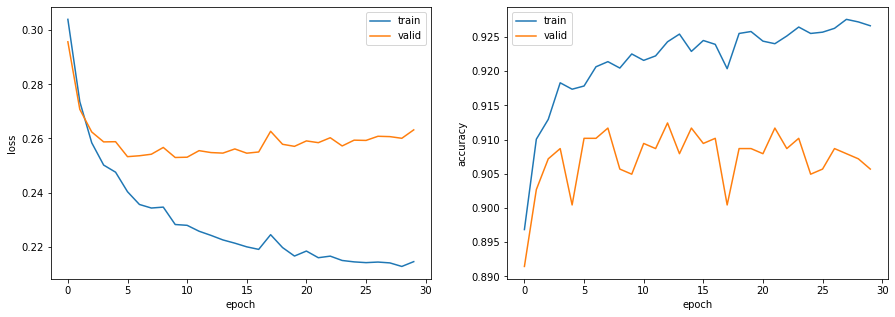

In [29]:
from matplotlib import pyplot as plt
import numpy as np

# 図示する
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [30]:
#76
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 学習
num_epochs = 30
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # チェックポイントの保存(5エポックごとに保存)
  if epoch % 5 == 0:
      torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pth')
      #学習途中のパラメータは model.state_dict(),最適化アルゴリズムの内部状態は optimizer.state_dict()でアクセス可能のため,各エポックでエポック数と合わせて保存する処理を追加する.
      #.pthファイルとして出力する

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3030, accuracy_train: 0.8995, loss_valid: 0.2970, accuracy_valid: 0.8907
epoch: 2, loss_train: 0.2719, accuracy_train: 0.9076, loss_valid: 0.2713, accuracy_valid: 0.8975
epoch: 3, loss_train: 0.2653, accuracy_train: 0.9089, loss_valid: 0.2687, accuracy_valid: 0.8945
epoch: 4, loss_train: 0.2516, accuracy_train: 0.9169, loss_valid: 0.2608, accuracy_valid: 0.9072
epoch: 5, loss_train: 0.2469, accuracy_train: 0.9172, loss_valid: 0.2579, accuracy_valid: 0.9012
epoch: 6, loss_train: 0.2404, accuracy_train: 0.9190, loss_valid: 0.2580, accuracy_valid: 0.9064
epoch: 7, loss_train: 0.2360, accuracy_train: 0.9205, loss_valid: 0.2543, accuracy_valid: 0.9034
epoch: 8, loss_train: 0.2438, accuracy_train: 0.9153, loss_valid: 0.2657, accuracy_valid: 0.9027
epoch: 9, loss_train: 0.2306, accuracy_train: 0.9210, loss_valid: 0.2559, accuracy_valid: 0.9079
epoch: 10, loss_train: 0.2275, accuracy_train: 0.9223, loss_valid: 0.2534, accuracy_valid: 0.9057
epoch: 11, loss_train: 0.2262

In [31]:
#77
import time #時間を計測するためにtimeをインポート

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs):
  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    
    # 開始時刻 s_time
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    if epoch % 5 == 0:
      torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pth')
    # 終了時刻 e_time
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid} #logを返り値にする

In [32]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# モデルの学習
for batch_size in [2 ** i for i in range(11)]: #バッチサイズを2倍していく
  print(f'batch size: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)

batch size: 1
epoch: 1, loss_train: 0.3013, accuracy_train: 0.8995, loss_valid: 0.2941, accuracy_valid: 0.9019, 4.4991sec
batch size: 2
epoch: 1, loss_train: 0.2830, accuracy_train: 0.9057, loss_valid: 0.2771, accuracy_valid: 0.8997, 2.3889sec
batch size: 4
epoch: 1, loss_train: 0.2757, accuracy_train: 0.9076, loss_valid: 0.2725, accuracy_valid: 0.9012, 1.2502sec
batch size: 8
epoch: 1, loss_train: 0.2730, accuracy_train: 0.9086, loss_valid: 0.2709, accuracy_valid: 0.9004, 0.6854sec
batch size: 16
epoch: 1, loss_train: 0.2719, accuracy_train: 0.9077, loss_valid: 0.2700, accuracy_valid: 0.9012, 0.4037sec
batch size: 32
epoch: 1, loss_train: 0.2713, accuracy_train: 0.9089, loss_valid: 0.2694, accuracy_valid: 0.9012, 0.2635sec
batch size: 64
epoch: 1, loss_train: 0.2709, accuracy_train: 0.9087, loss_valid: 0.2692, accuracy_valid: 0.9012, 0.1844sec
batch size: 128
epoch: 1, loss_train: 0.2702, accuracy_train: 0.9091, loss_valid: 0.2690, accuracy_valid: 0.9012, 0.2065sec
batch size: 256
epo

In [33]:
#バッチサイズが大きいほど概ね計算時間は短くなっている

In [34]:
#78
def calculate_loss_and_accuracy(model, criterion, loader, device): #GPUに送る
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device) #to(device)でGPUに送る
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    if epoch % 5 == 0:
      torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pth')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [35]:
# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'batch size: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1, device=device)

batch size: 1
epoch: 1, loss_train: 0.3031, accuracy_train: 0.8981, loss_valid: 0.2969, accuracy_valid: 0.8922, 10.5542sec
batch size: 2
epoch: 1, loss_train: 0.2827, accuracy_train: 0.9048, loss_valid: 0.2800, accuracy_valid: 0.8997, 5.2284sec
batch size: 4
epoch: 1, loss_train: 0.2762, accuracy_train: 0.9068, loss_valid: 0.2735, accuracy_valid: 0.9004, 2.6951sec
batch size: 8
epoch: 1, loss_train: 0.2732, accuracy_train: 0.9073, loss_valid: 0.2711, accuracy_valid: 0.9004, 1.4040sec
batch size: 16
epoch: 1, loss_train: 0.2720, accuracy_train: 0.9080, loss_valid: 0.2701, accuracy_valid: 0.9027, 0.8095sec
batch size: 32
epoch: 1, loss_train: 0.2714, accuracy_train: 0.9079, loss_valid: 0.2697, accuracy_valid: 0.8982, 0.5391sec
batch size: 64
epoch: 1, loss_train: 0.2710, accuracy_train: 0.9078, loss_valid: 0.2694, accuracy_valid: 0.9019, 0.2838sec
batch size: 128
epoch: 1, loss_train: 0.2703, accuracy_train: 0.9080, loss_valid: 0.2693, accuracy_valid: 0.9027, 0.1949sec
batch size: 256
ep

# #77の場合よりもGPU使用時の方が時間が短くなっていることが確認できる

In [36]:
#79
from torch.nn import functional as F

class MLPNet(nn.Module): #多層ニューラルネットワークの導入(入力層 -> 中間層 -> 出力層)
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size) 
    self.bn = nn.BatchNorm1d(mid_size) #バッチノーマライゼーションを行う　https://deep-learning-study.net/batch-normalization/

  def forward(self, x):
    x = F.relu(self.fc(x)) #活性化関数ReLUの導入(0未満はすべて0,その他はそのまま) https://atmarkit.itmedia.co.jp/ait/articles/2003/11/news016.html
    for i in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))

    return x

In [98]:
from torch import optim

def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return loss / len(loader), correct / total


def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, num_eta_min,device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=num_eta_min, last_epoch=-1)
  #学習率を少しずつ下げる(eta_minを極小値とする)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      #optimizerを1ステップ進める
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    #エポック数を捜索するため削除
    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了(今回の学習基準)
    #if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      #break
        

    # スケジューラを1ステップ進める
    scheduler.step()

  return log_train, log_valid

In [39]:
!pip install optuna

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 308 kB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 112 kB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 149 kB 63.7 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=342c30537906926c31bc2685c2e3f9183f6664f4dbc7dac604b4d79f2ff6d9e7
  Stored in directory: /home/jovyan/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None


In [107]:
def Get_Optimizer(trial, model): #optimizerの最適化関数
    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop', 'SGD']) 
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1) #学習率の初期値を変更
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    return optimizer


def objective(trial): #中間層のニューロン数と中間層の数とオプティマイザとバッチサイズとエポック数を最適化する
    
    # datasetの作成
    dataset_train = CreateDataset(X_train, y_train)
    dataset_valid = CreateDataset(X_valid, y_valid)
    
    # モデルの定義
    model = MLPNet(300,trial.suggest_int('mid_size', 10, 1000) , 4, trial.suggest_int('num_mid_layers', 1, 5) ) #中間層のニューロン数と中間層の数を変更する
    
    # オプティマイザの定義
    #optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
    optimizer = Get_Optimizer(trial,model)

    # 損失関数の定義
    criterion = nn.CrossEntropyLoss()
    
    #バッチサイズの定義
    #batch_size = 2048
    batch_size = int(trial.suggest_discrete_uniform('batch_size', 1024, 4096, 128)) #適切なバッチサイズを1024-4096の間で128刻みで探す
    
    #エポック数の定義
    num_epochs = trial.suggest_int('num_epochs', 10, 200) #適切なエポック数を探す
    #num_epochs = 1000
    
    #スケジューラの学習率の最小値
    num_eta_min = trial.suggest_loguniform('min_lr', 1e-5, 1e-1)
    
    # デバイスの指定
    device = torch.device('cuda')
    
    
    return train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, num_eta_min, device)[1][-1][0] #log_validの最後のlossを取得
    #return train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, num_eta_min, device)[1][-3][0] #log_validの最後から3番目のlossを取得（最小値)

In [108]:
#ハイパーパラメータチューニングを行う
import optuna
study = optuna.create_study()
#study.optimize(objective, n_trials=50) #50回調べる
study.optimize(objective, timeout=3600) #1時間

[I 2022-01-10 18:01:42,508] A new study created in memory with name: no-name-7a97b0b3-8d40-4c01-97ec-0adf37d0c4ba
[I 2022-01-10 18:02:04,053] Trial 0 finished with value: 1.2316906452178955 and parameters: {'mid_size': 352, 'num_mid_layers': 4, 'optimizer': 'SGD', 'lr': 0.001186825963050564, 'batch_size': 2304.0, 'num_epochs': 112, 'min_lr': 2.044142055400698e-05}. Best is trial 0 with value: 1.2316906452178955.
[I 2022-01-10 18:02:18,274] Trial 1 finished with value: 1.2273932695388794 and parameters: {'mid_size': 470, 'num_mid_layers': 4, 'optimizer': 'SGD', 'lr': 0.0002598798895945363, 'batch_size': 2560.0, 'num_epochs': 71, 'min_lr': 0.00014823286128036537}. Best is trial 1 with value: 1.2273932695388794.
[I 2022-01-10 18:02:43,478] Trial 2 finished with value: 1.3299405574798584 and parameters: {'mid_size': 261, 'num_mid_layers': 4, 'optimizer': 'SGD', 'lr': 7.474540016328848e-05, 'batch_size': 2688.0, 'num_epochs': 130, 'min_lr': 0.00041855824426006993}. Best is trial 1 with valu

In [109]:
def display_train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, num_eta_min, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=num_eta_min, last_epoch=-1)
  #学習率を少しずつ下げる(eta_minを極小値とする)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      #optimizerを1ステップ進める
      optimizer.step()

    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pth')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了(今回の学習基準)
    #if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      #break

    # スケジューラを1ステップ進める
    scheduler.step()

  return {'train': log_train, 'valid': log_valid}

In [112]:
study.best_params

{'mid_size': 989,
 'num_mid_layers': 1,
 'optimizer': 'RMSprop',
 'lr': 0.0001156932255340311,
 'batch_size': 3200.0,
 'num_epochs': 30,
 'min_lr': 3.726603845489223e-05}

In [113]:
study.best_value

0.21301452815532684

In [114]:
# モデルの学習

# datasetの作成
dataset_train = CreateDataset(X_train, y_train)
dataset_valid = CreateDataset(X_valid, y_valid)
    
# モデルの定義
model = MLPNet(300, 989 , 4, 1) 
    
# オプティマイザの定義
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.0001156932255340311)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()
    
#バッチサイズの定義
batch_size = 3200.0
    
#エポック数の定義
num_epochs = 30

#スケジューラの学習率の最小値
num_eta_min = 3.726603845489223e-05
    
# デバイスの指定
device = torch.device('cuda')

log = display_train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, num_epochs, num_eta_min, device)

epoch: 1, loss_train: 0.1884, accuracy_train: 0.9421, loss_valid: 0.2495, accuracy_valid: 0.9154, 0.6267sec
epoch: 2, loss_train: 0.1371, accuracy_train: 0.9604, loss_valid: 0.2468, accuracy_valid: 0.9132, 0.6367sec
epoch: 3, loss_train: 0.1094, accuracy_train: 0.9737, loss_valid: 0.2454, accuracy_valid: 0.9184, 0.5742sec
epoch: 4, loss_train: 0.0617, accuracy_train: 0.9875, loss_valid: 0.2331, accuracy_valid: 0.9207, 0.5955sec
epoch: 5, loss_train: 0.0420, accuracy_train: 0.9929, loss_valid: 0.2334, accuracy_valid: 0.9199, 0.5761sec
epoch: 6, loss_train: 0.0287, accuracy_train: 0.9951, loss_valid: 0.2548, accuracy_valid: 0.9222, 0.5921sec
epoch: 7, loss_train: 0.0213, accuracy_train: 0.9956, loss_valid: 0.2564, accuracy_valid: 0.9229, 0.5733sec
epoch: 8, loss_train: 0.0230, accuracy_train: 0.9952, loss_valid: 0.2837, accuracy_valid: 0.9222, 0.5910sec
epoch: 9, loss_train: 0.0166, accuracy_train: 0.9959, loss_valid: 0.3019, accuracy_valid: 0.9132, 0.6727sec
epoch: 10, loss_train: 0.009

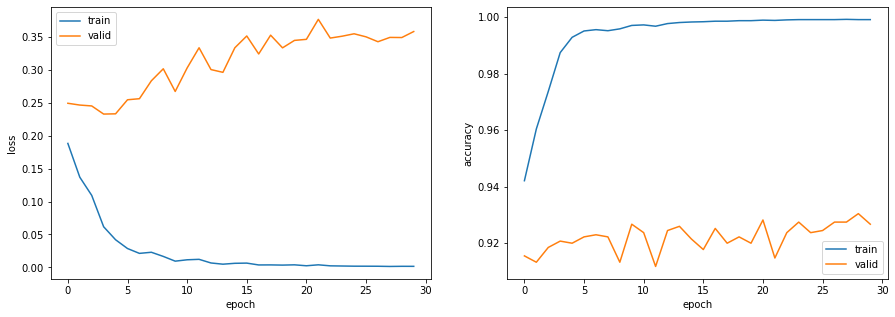

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [116]:
def calculate_accuracy(model, loader, device):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()

  return correct / total

In [117]:
# 正解率の確認
acc_train = calculate_accuracy(model, dataloader_train, device)
acc_test = calculate_accuracy(model, dataloader_test, device)
print(f'accuracy of train：{acc_train:.3f}')
print(f'accuracy of test ：{acc_test:.3f}')

accuracy of train：0.999
accuracy of test ：0.920


In [ ]:
#以前のものと比べて精度がかなり良くなっている